<a href="https://colab.research.google.com/github/CeloCruz/Hackathon/blob/main/Copia_de_Data_Science_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon Final

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):
 pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
teams = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/teams_1.csv')
teams.head()

,Squad_id,Squad,#Pl,Age,Poss,MP,Min,Gls,Ast,PK,...,Carries_PrgDist,Carries_Dis,Receiving_Rec,2CrdY,Fls,Fld,Off,PKcon,OG,Recov
0,aa11fb42,Alavés,22,27.0,43.5,26,2340,30,18,1,...,13585,266,5803,1,276,262,56,2,4,1352
1,e9fecaf2,Alhama,24,26.5,39.2,26,2340,20,12,1,...,8122,222,3911,3,332,235,82,3,3,1547
2,94929c05,Athletic Club,23,24.6,48.5,26,2340,28,20,2,...,15920,263,7254,0,243,224,64,4,0,1694
3,b56c2667,Atlético Madrid,22,26.2,55.1,26,2340,46,30,3,...,24412,334,9880,0,247,273,79,4,1,1546
4,15f49df1,Barcelona,28,27.1,69.4,25,2250,100,69,3,...,26950,283,13976,0,217,207,104,1,0,1611


### ¿Hay valores faltantes en nuestro dataset?

In [ ]:
teams.isnull().sum().sum()

0

Comprobamos que no existen valores faltantes facilmente detectables por pandas

In [ ]:
teams[teams.isin(['-','--','na','.','nan','unknown','ukn','Unknown'])].count().sort_values(ascending=False)

Squad_id          0
Touches_DefPen    0
GCA               0
GCA_PassLive      0
GCA_PassDead      0
                 ..
PPA               0
SCA               0
SCA_PassLive      0
SCA_PassDead      0
Recov             0
Length: 62, dtype: int64

Vemos que tenemos un dataset sin valores faltantes para ninguna de las columnas

¿Tenemos registros duplicados?

In [ ]:
teams.duplicated().sum()

0

¿Cuántas equipos hay en el dataset?

In [ ]:
teams.Squad.nunique()

62

Tenemos un dataset bastante limpio en el que no existen campos con valores falatantes para ningun atributo de ninguno de los registros

## Análisis de contenido de datos

Facilitamos el nombre e id de los equipos para el equipo de backend

In [ ]:
teams_csv = teams[['Squad_id','Squad']]
teams_csv.set_index('Squad_id', inplace=True)
teams_csv.to_csv('teams_clean.csv')

### Atributos de mayor interés
Seleccionamos aquellos atributos de mayor interés que nos den una vista global del rendimiento del fútbol femenino, así como estadísticas mas relevantes por equipo, que luego nos permitiran hacer diversos tipos de análisis comparandolos entre todos.



In [ ]:
teams_df = teams[['Squad_id','Squad','#Pl','Age','Poss','MP','Gls','Ast','PK','PKatt','CrdY','CrdR','Sh','Fls','Fld','Off','PKcon','OG']]
teams_df.head()

,Squad_id,Squad,#Pl,Age,Poss,MP,Gls,Ast,PK,PKatt,CrdY,CrdR,Sh,Fls,Fld,Off,PKcon,OG
0,aa11fb42,Alavés,22,27.0,43.5,26,30,18,1,1,52,1,242,276,262,56,2,4
1,e9fecaf2,Alhama,24,26.5,39.2,26,20,12,1,1,55,4,276,332,235,82,3,3
2,94929c05,Athletic Club,23,24.6,48.5,26,28,20,2,3,34,1,284,243,224,64,4,0
3,b56c2667,Atlético Madrid,22,26.2,55.1,26,46,30,3,4,36,0,343,247,273,79,4,1
4,15f49df1,Barcelona,28,27.1,69.4,25,100,69,3,5,24,0,614,217,207,104,1,0


### Inspeccionamos el dataset de los partidos

In [ ]:
matches = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches_1.csv')
matches.head()

,Match_id,Date,Time,Wk,Home_id,Away_id,ScoreHome,ScoreAway,League_name,Round
0,4df3a732,2022-09-17,12:00,2,15f49df1,4c088abe,2,0,Liga-F,NaN
1,87c755cd,2022-09-17,12:00,2,aa11fb42,89818574,1,2,Liga-F,NaN
2,abfde9d9,2022-09-17,16:00,2,c21f25d3,7a7bef84,2,0,Liga-F,NaN
3,d0329f46,2022-09-17,16:00,2,54582b93,f96ff499,2,0,Liga-F,NaN
4,f4452586,2022-09-17,18:00,2,215d9026,b56c2667,1,3,Liga-F,NaN


¿Qué tamaño tiene el set de datos de matches?

In [ ]:
matches.shape

(643, 10)

**Relacionamos ambos datasets** para obtener el dato de a que liga pertenece cada equipo, para eso relacionamos el `squad_id` con el id de los equipos localcales (`home_id`) haciendo un merge y obteniendo así la liga a la que pertenece cada equipo.

In [ ]:
matches_clean = matches.loc[:, ["Home_id", "League_name"]].drop_duplicates()
matches_clean.columns = ["Squad_id", "League_name"]
teams_merged = teams_df.merge(matches_clean, on='Squad_id')
teams_merged.set_index('Squad_id', inplace=True)
teams_merged.columns = teams_merged.columns.str.lower()

In [ ]:
teams_df.head()

,Squad_id,Squad,#Pl,Age,Poss,MP,Gls,Ast,PK,PKatt,CrdY,CrdR,Sh,Fls,Fld,Off,PKcon,OG
0,aa11fb42,Alavés,22,27.0,43.5,26,30,18,1,1,52,1,242,276,262,56,2,4
1,e9fecaf2,Alhama,24,26.5,39.2,26,20,12,1,1,55,4,276,332,235,82,3,3
2,94929c05,Athletic Club,23,24.6,48.5,26,28,20,2,3,34,1,284,243,224,64,4,0
3,b56c2667,Atlético Madrid,22,26.2,55.1,26,46,30,3,4,36,0,343,247,273,79,4,1
4,15f49df1,Barcelona,28,27.1,69.4,25,100,69,3,5,24,0,614,217,207,104,1,0


In [ ]:
teams_merged

,squad,#pl,age,poss,mp,gls,ast,pk,pkatt,crdy,crdr,sh,fls,fld,off,pkcon,og,league_name
Squad_id,,,,,,,,,,,,,,,,,,
aa11fb42,Alavés,22,27.0,43.5,26,30,18,1,1,52,1,242,276,262,56,2,4,Liga-F
e9fecaf2,Alhama,24,26.5,39.2,26,20,12,1,1,55,4,276,332,235,82,3,3,Liga-F
94929c05,Athletic Club,23,24.6,48.5,26,28,20,2,3,34,1,284,243,224,64,4,0,Liga-F
b56c2667,Atlético Madrid,22,26.2,55.1,26,46,30,3,4,36,0,343,247,273,79,4,1,Liga-F
15f49df1,Barcelona,28,27.1,69.4,25,100,69,3,5,24,0,614,217,207,104,1,0,Liga-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06d05f19,Internazionale,27,27.2,57.4,40,46,30,2,2,32,0,391,294,204,55,3,0,Serie-A
613577b8,Juventus,24,28.3,58.7,40,57,43,3,3,21,3,414,212,241,41,3,0,Serie-A
f7d05cb5,Parma Calcio 1913,28,26.4,45.6,40,20,13,0,4,39,0,242,291,251,68,7,0,Serie-A


In [ ]:
groupby_league = teams_merged.groupby('league_name')[['gls','ast','poss']].mean()
groupby_league = groupby_league.applymap('{:.2f}'.format)
groupby_league

,gls,ast,poss
league_name,,,
Division-1-Feminine,27.42,19.67,49.99
Frauen-Bundesliga,27.08,18.92,50.06
Liga-F,40.88,27.88,50.04
Serie-A,34.50,22.00,50.00
Womens-Super-League,27.17,19.25,50.00


In [ ]:
attack = teams_merged[['squad','gls','ast','poss','league_name']]
attack.set_index('squad', inplace=True)

In [ ]:
team_attstats = attack.merge(groupby_league, right_on='league_name', left_on='league_name', how='left')
team_attstats.drop('goals_league', axis=1, inplace=True)
team_attstats.index = attack.index
team_attstats.drop('league_name', axis=1, inplace=True)
team_attstats[['gls_y','ast_y','poss_y']] = team_attstats[['gls_y','ast_y','poss_y']].astype(float)
team_attstats.head()

,gls_x,ast_x,poss_x,gls_y,ast_y,poss_y
squad,,,,,,
Alavés,30,18,43.5,40.88,27.88,50.04
Alhama,20,12,39.2,40.88,27.88,50.04
Athletic Club,28,20,48.5,40.88,27.88,50.04
Atlético Madrid,46,30,55.1,40.88,27.88,50.04
Barcelona,100,69,69.4,40.88,27.88,50.04


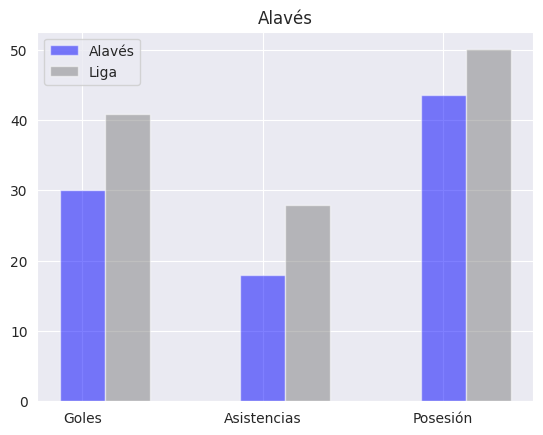

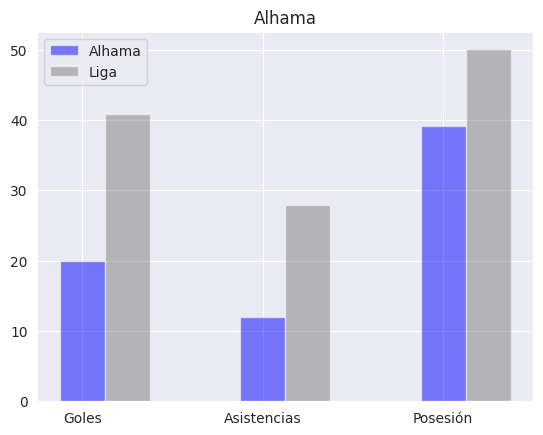

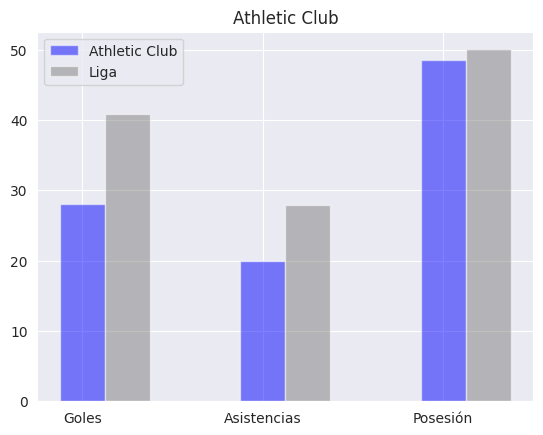

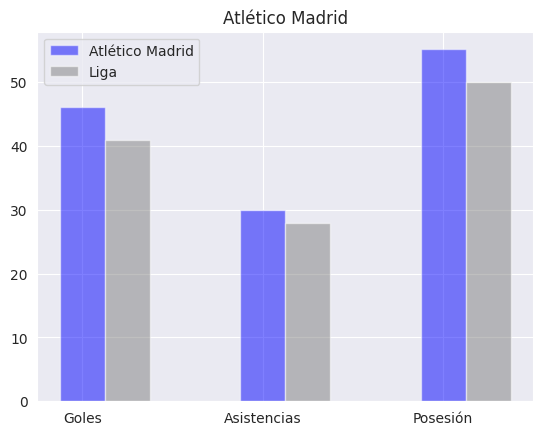

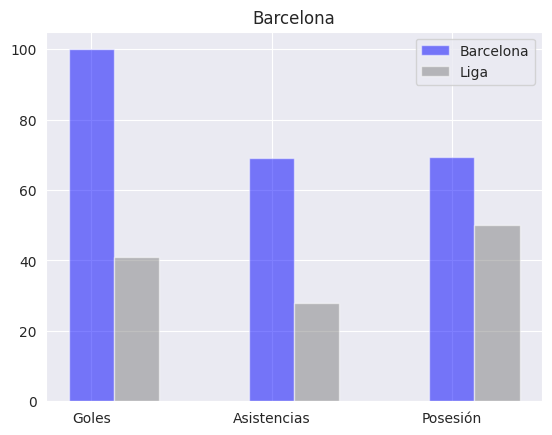

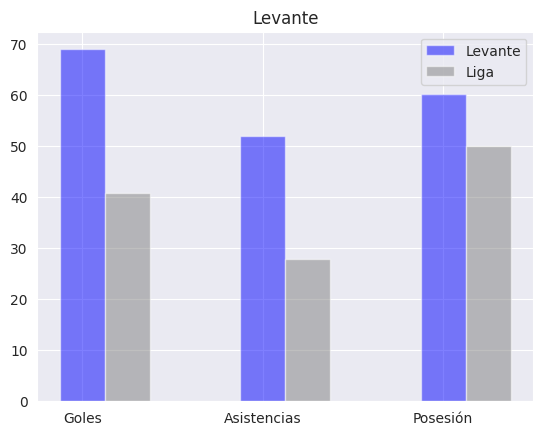

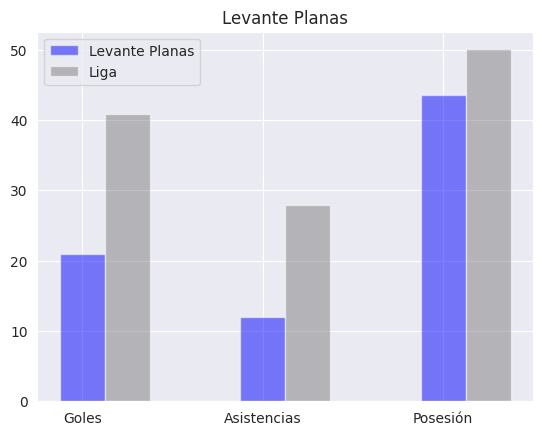

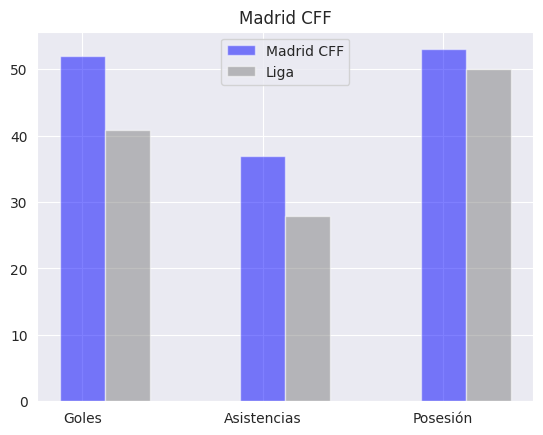

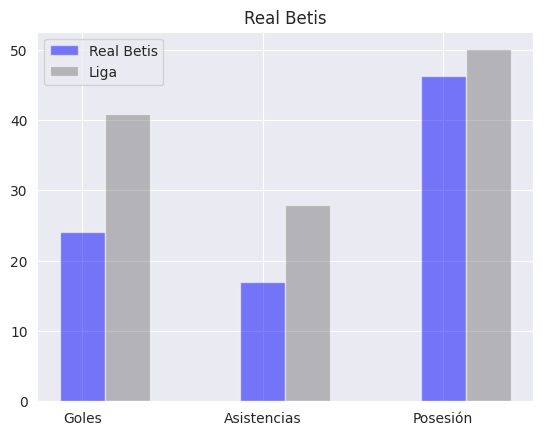

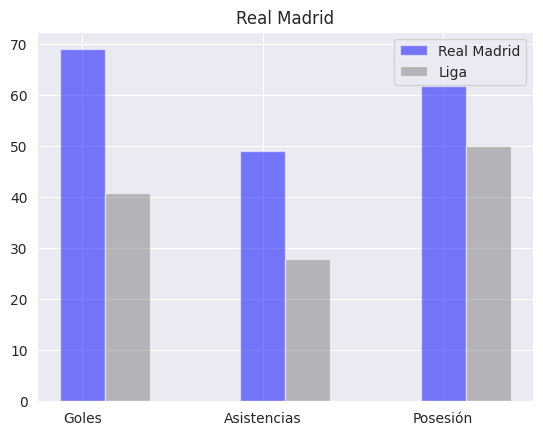

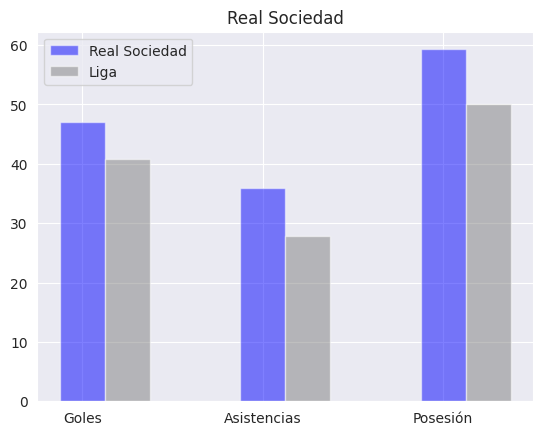

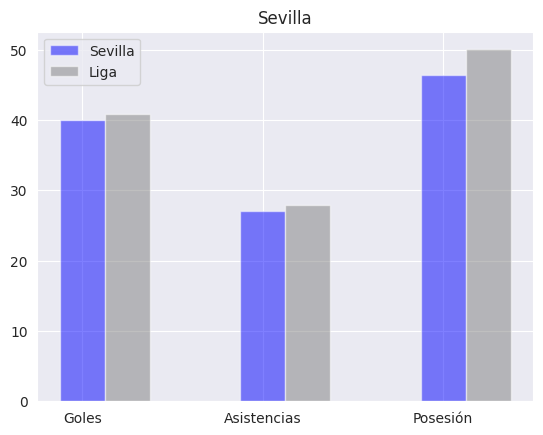

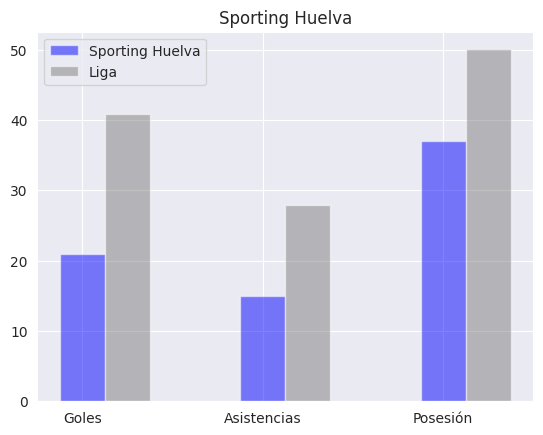

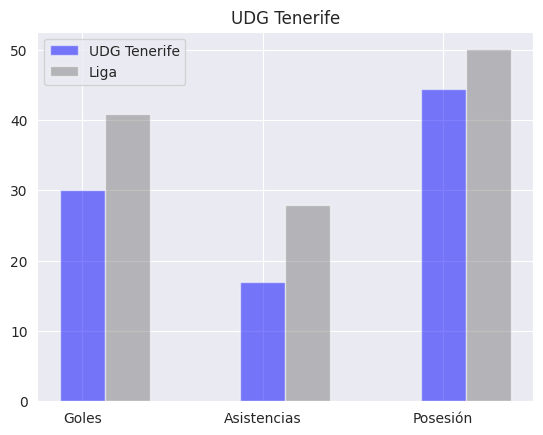

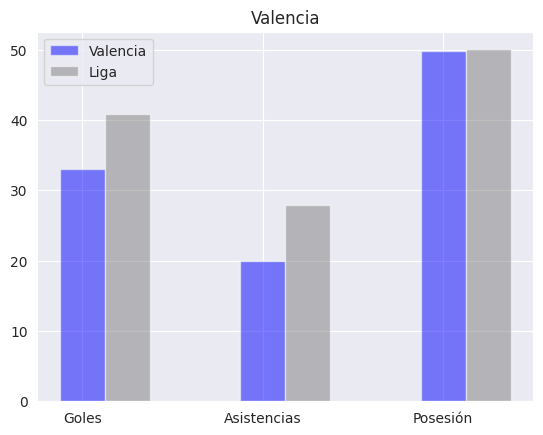

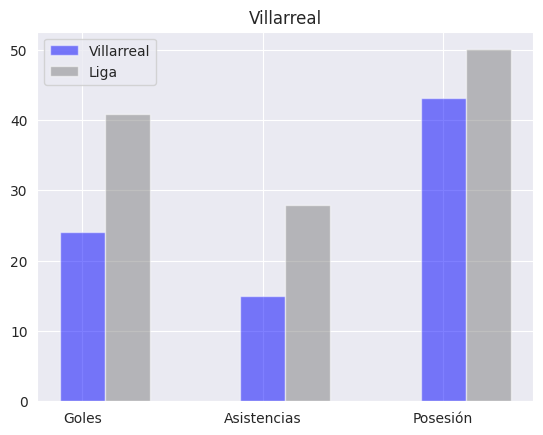

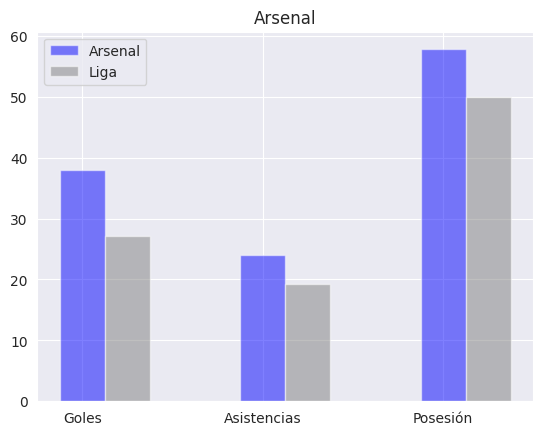

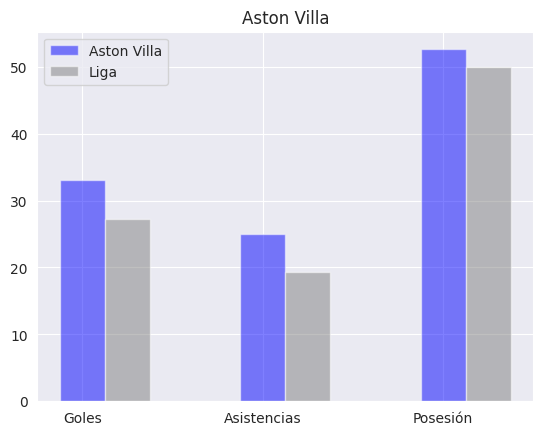

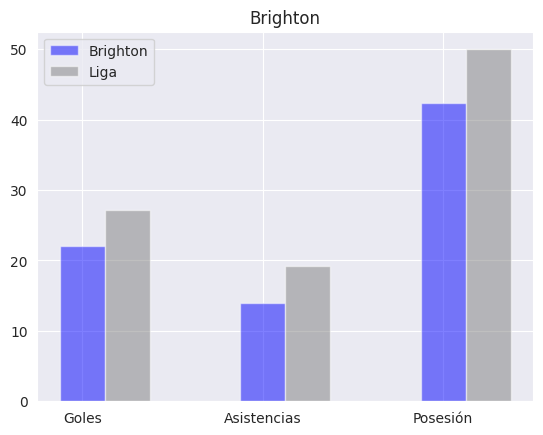

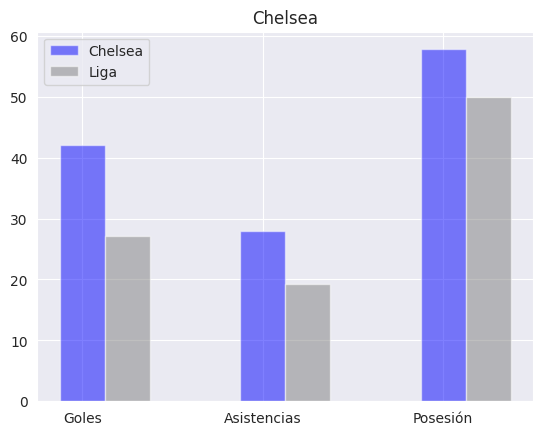

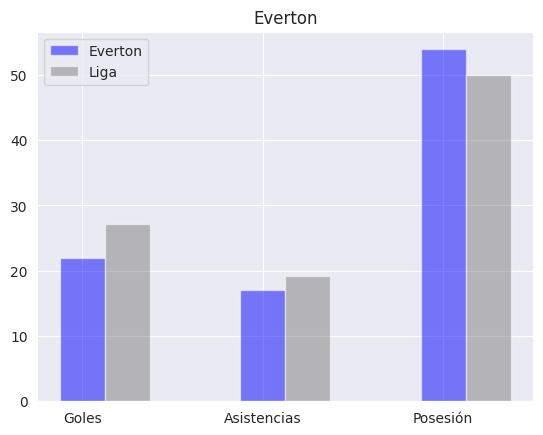

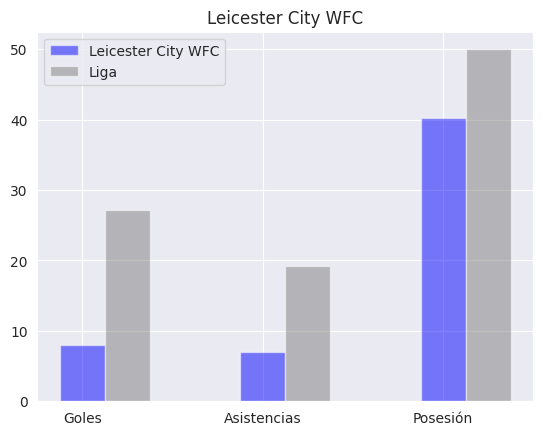

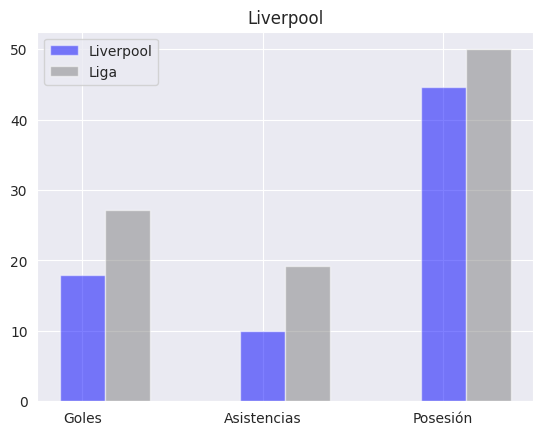

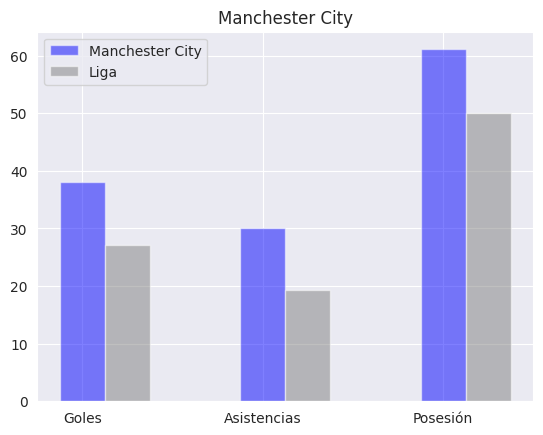

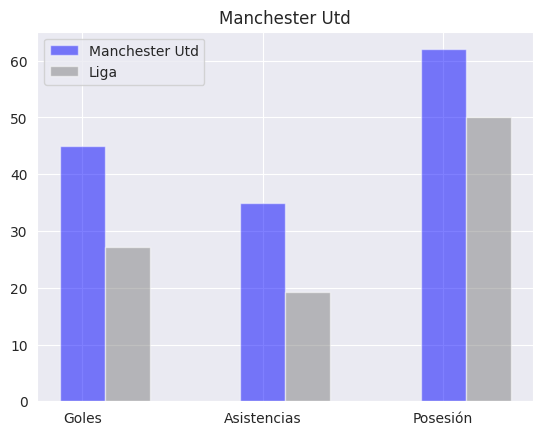

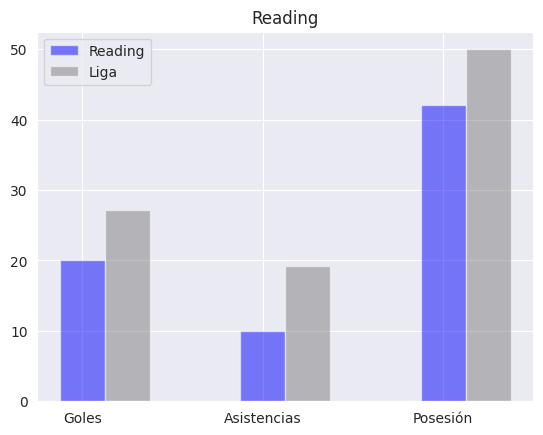

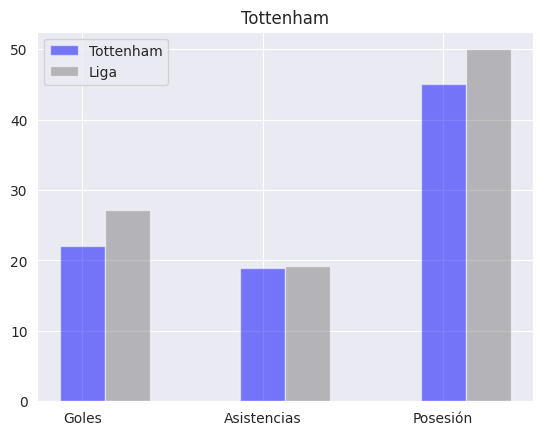

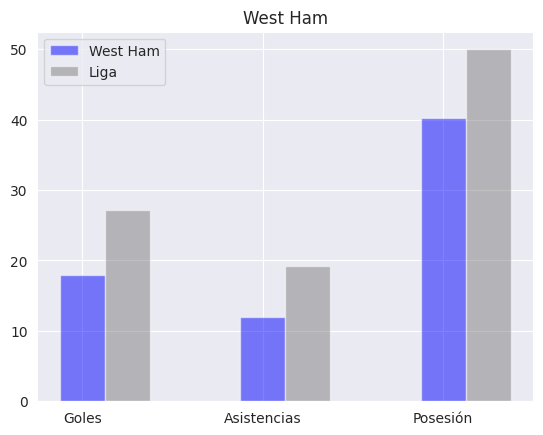

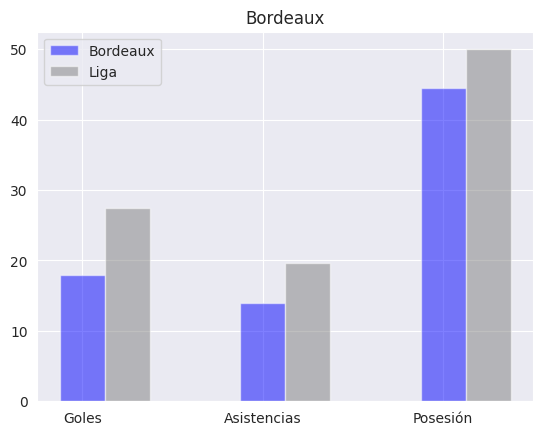

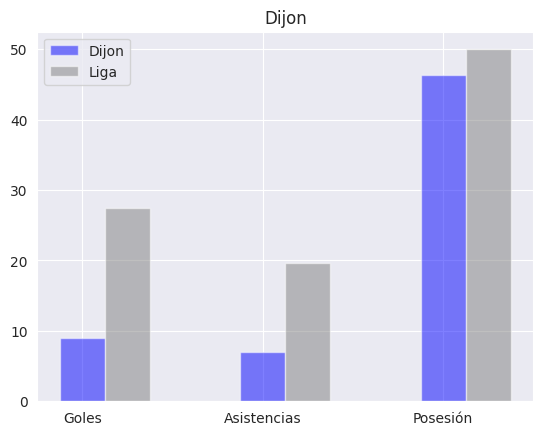

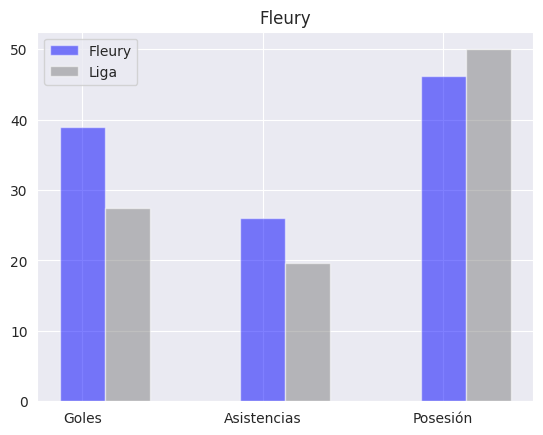

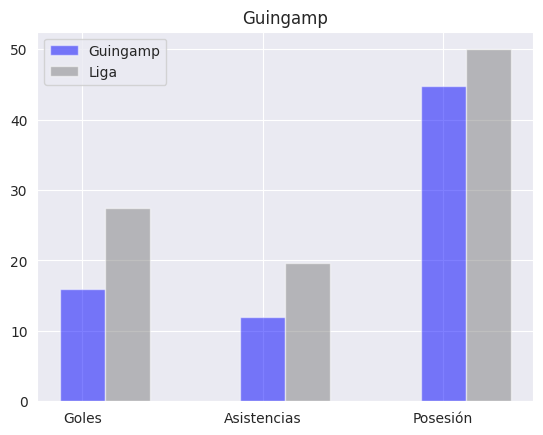

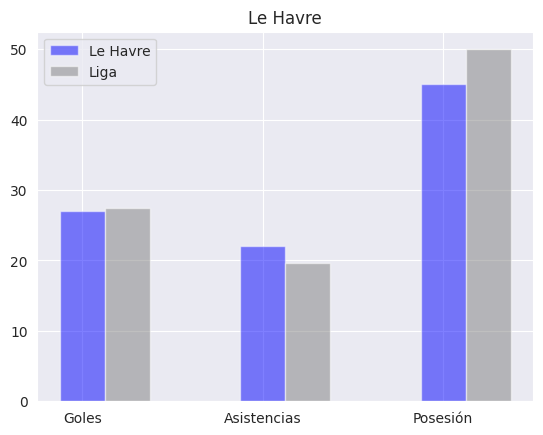

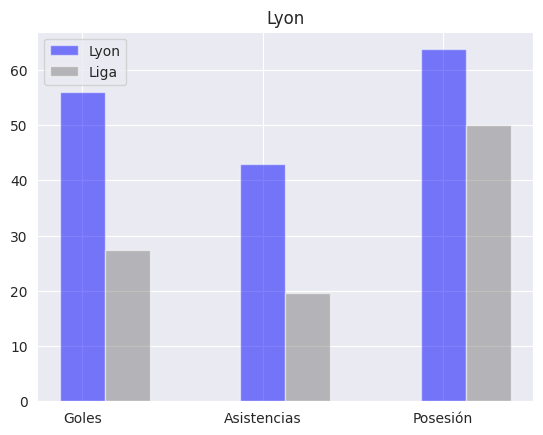

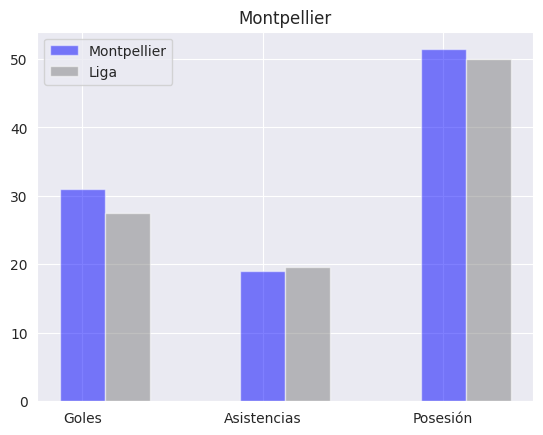

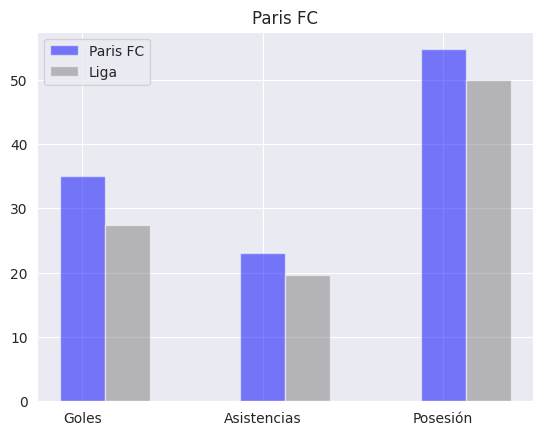

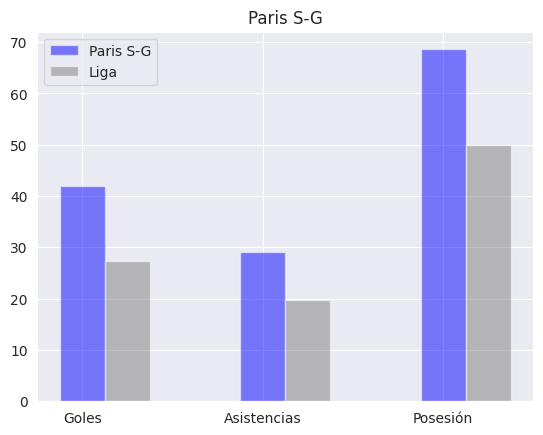

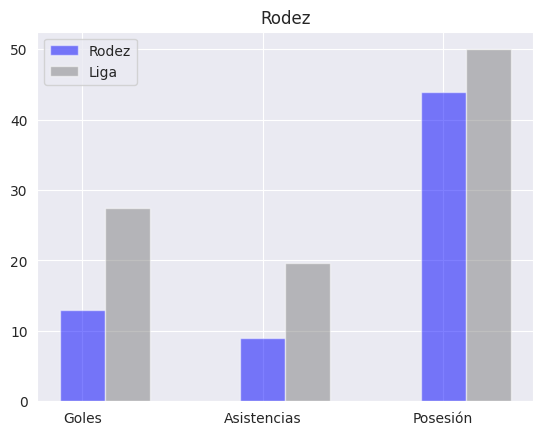

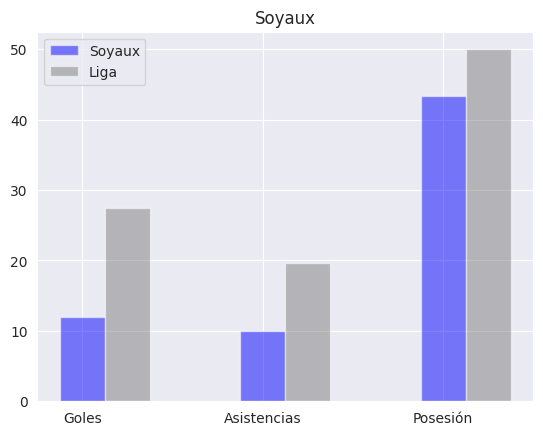

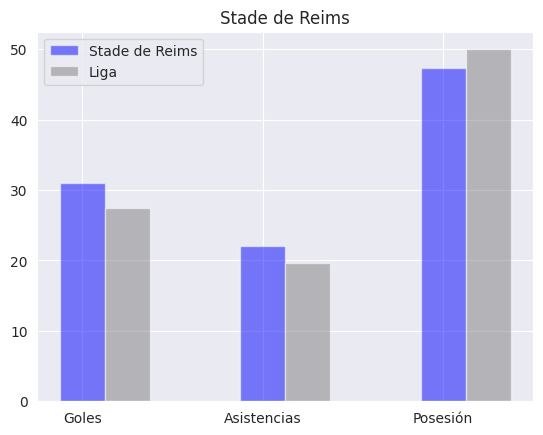

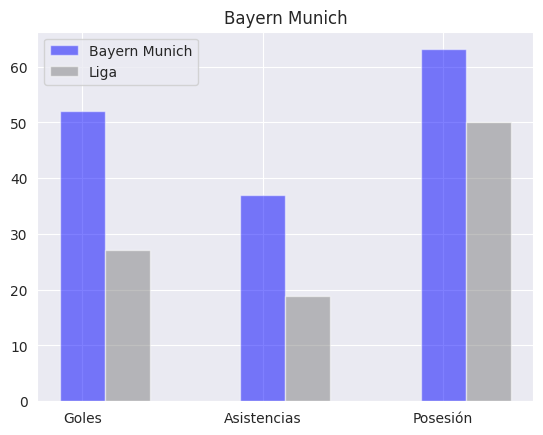

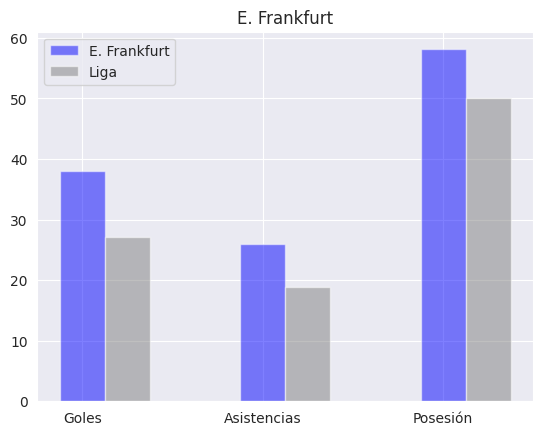

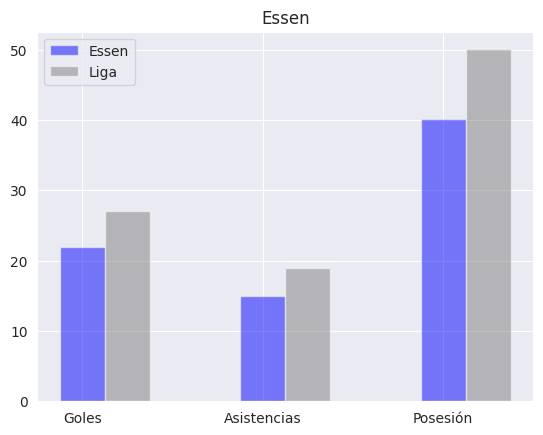

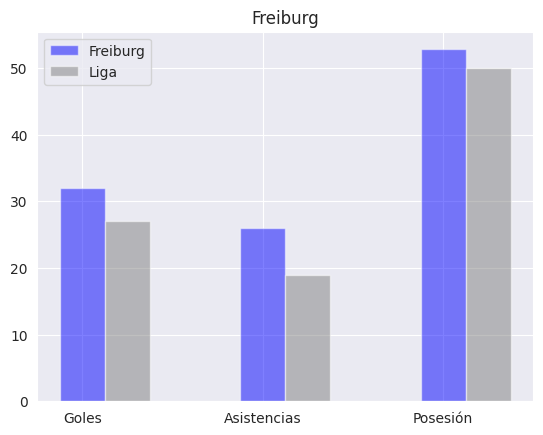

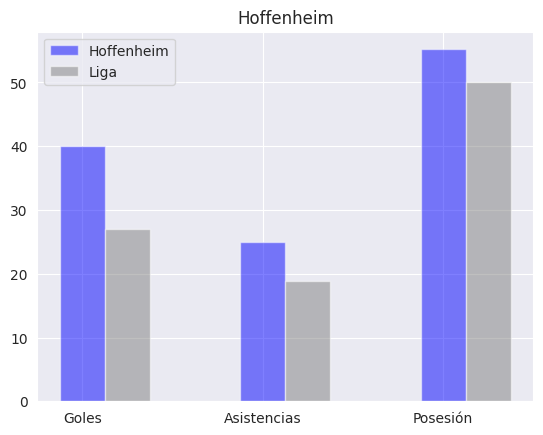

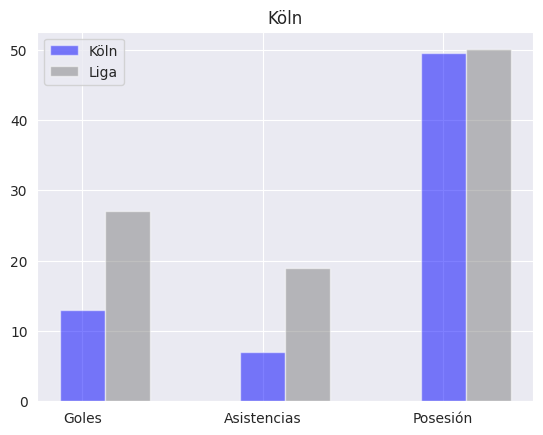

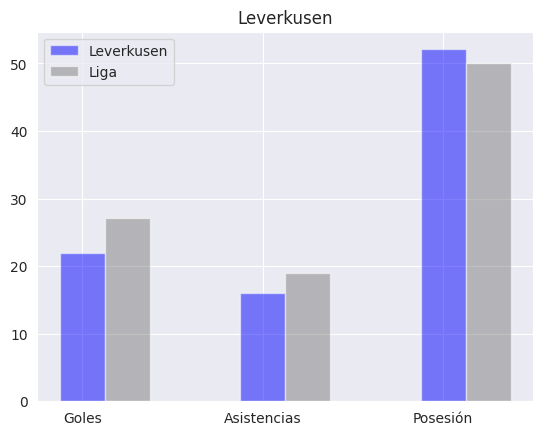

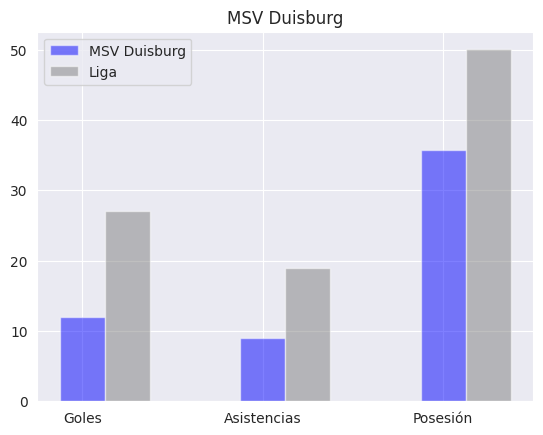

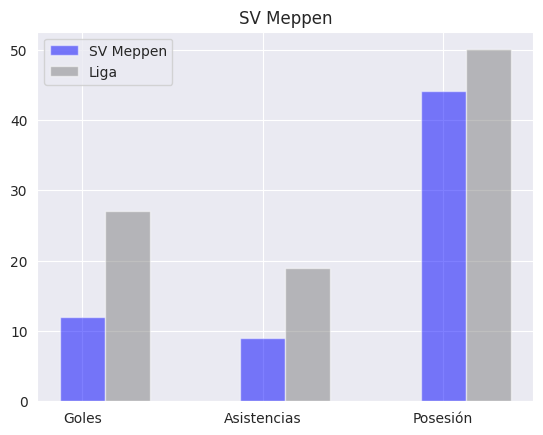

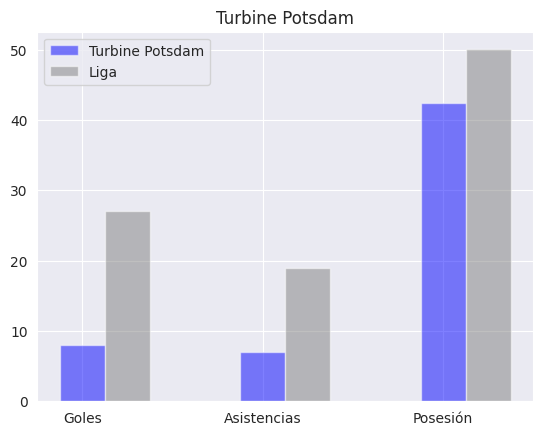

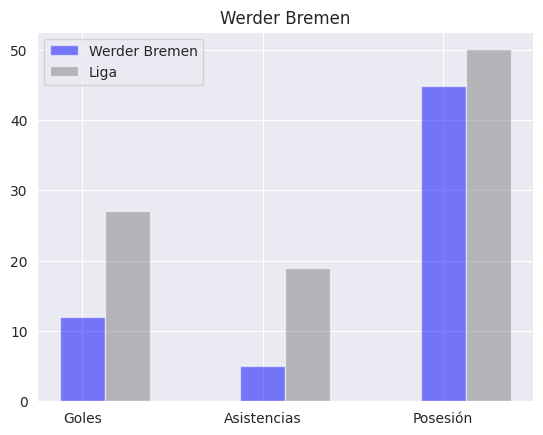

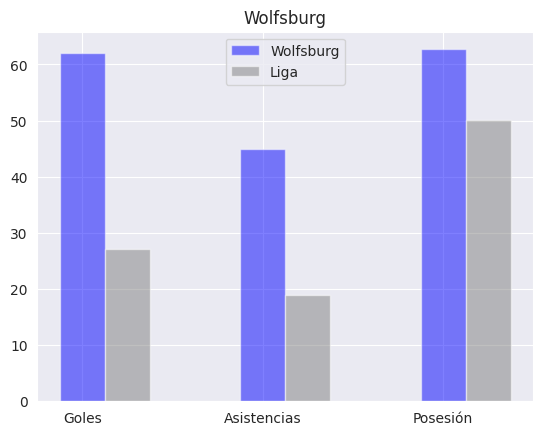

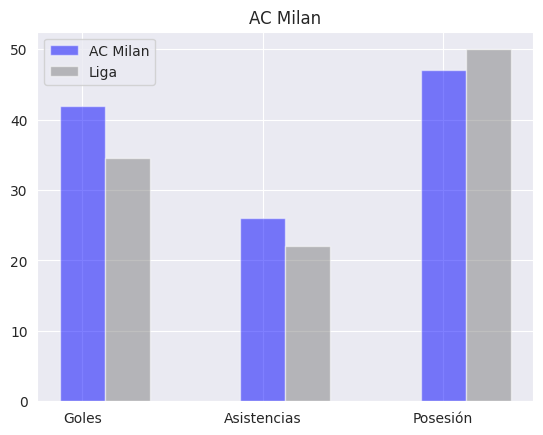

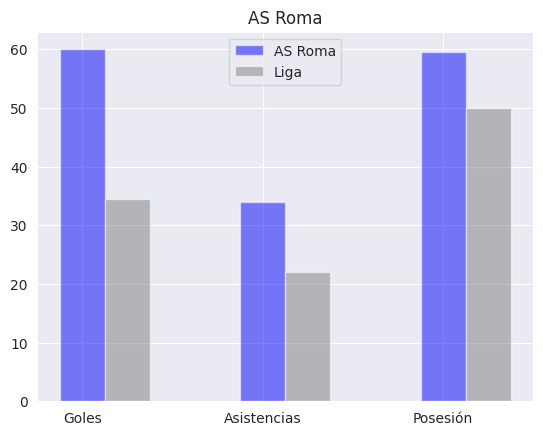

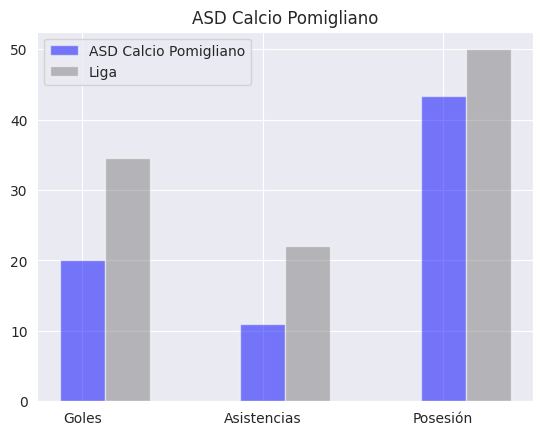

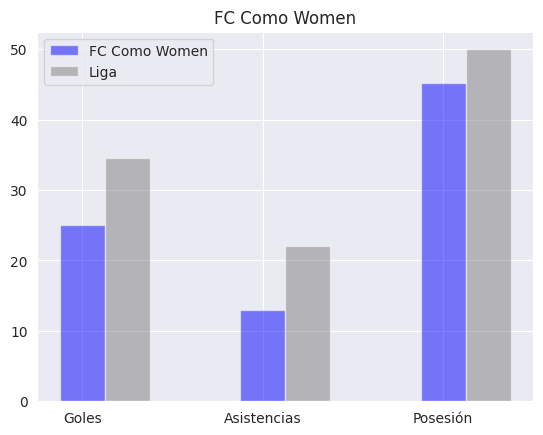

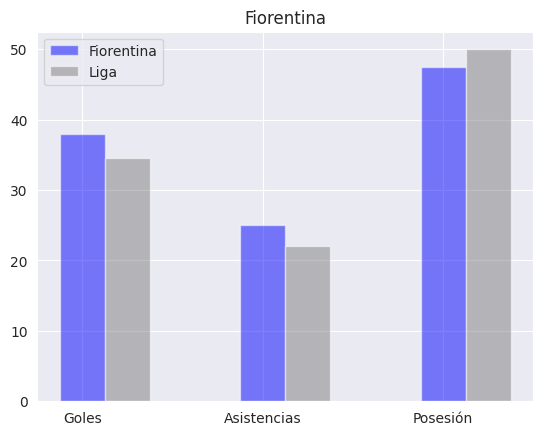

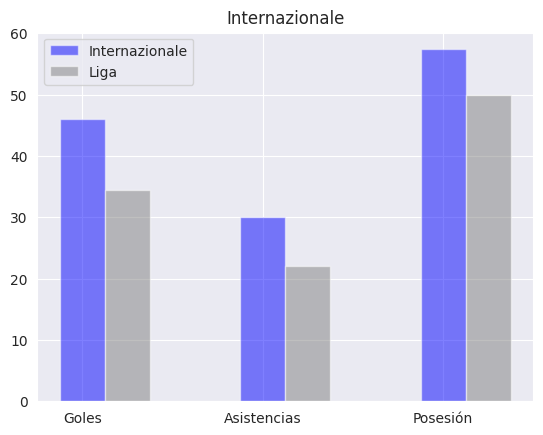

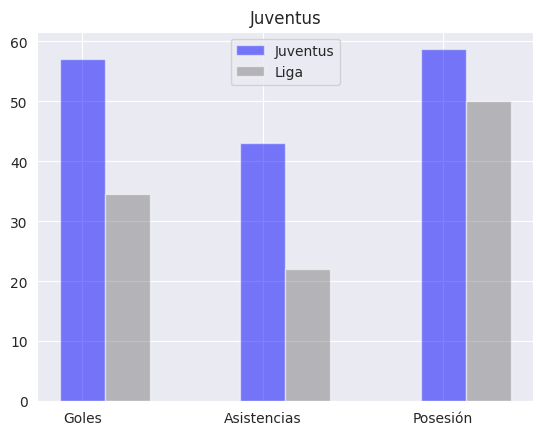

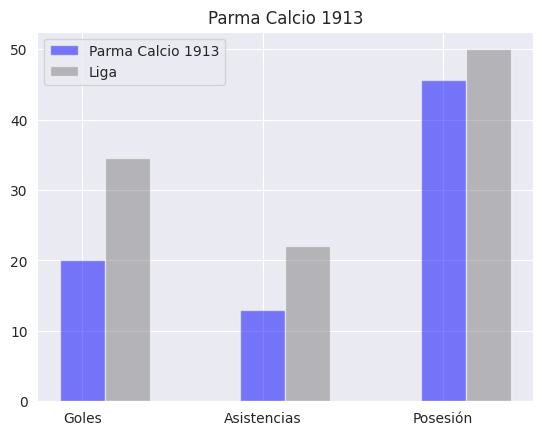

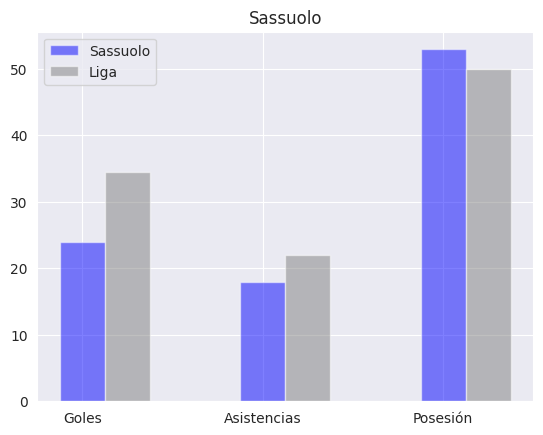

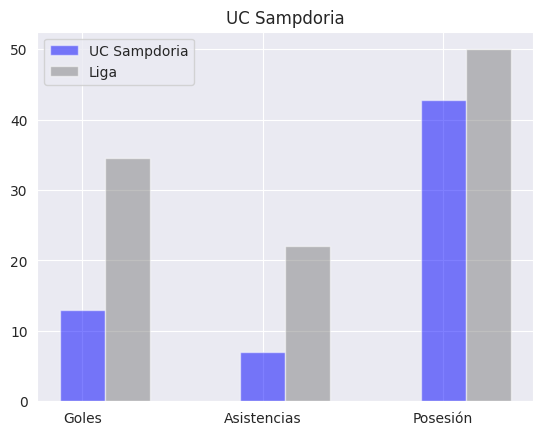

In [ ]:
for team in team_attstats.index:
  count += 1
  team_attack = team_attstats.loc[team, ['gls_x','ast_x','poss_x']]
  team_attack2 = team_attstats.loc[team, ['gls_y','ast_y','poss_y']]
  plt.figure()
  pos = list(range(len(team_attack)))
  plt.bar(pos, team_attack, width=0.25, alpha=0.5, color='blue', label=f'{team}')
  plt.bar([p + 0.25 for p in pos], team_attack2, width=0.25, alpha=0.5, color='gray', label='Liga')
  plt.xticks(range(3), ['Goles','Asistencias','Posesión'])
  plt.legend()
  plt.title(f'{team}')
  plt.savefig(f'Comparacion_{team}.jpg')